In [17]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import os

In [2]:
!pip install wordcloud matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
!pip install --upgrade wordcloud matplotlib


In [6]:
# URL of the website to scrape
url = 'https://www.theminiadhdcoach.es/'
output_file = 'scraped_content.txt'

In [7]:
visited_urls = set()

In [8]:
# Send a GET request to the website
response = requests.get(url)

In [9]:
# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all paragraph tags and print their text
    for paragraph in soup.find_all('p'):
        print(paragraph.get_text())
else:
    print(f'Failed to retrieve the page. Status code: {response.status_code}')

Mi nombre es Alice y me diagnosticaron a los 29 años. Desde entonces, creo contenido sobre el TDAH para crear conciencia.
Creé The Mini ADHD Coach en agosto de 2020 cuando me diagnosticaron TDAH a los 29 años. Después de años de cuestionamientos, terapia, agotamiento y cambios caóticos en la carrera profesional, finalmente entendí por qué estaba luchando con tantas cosas. Aprendí a crear conciencia sobre el TDAH y ayudar a la comunidad de TDAH a prosperar.
Comencé a publicar algunos garabatos sobre el TDAH en Instagram simplemente para compartir mi experiencia como un adulto recientemente diagnosticado. ¡Solo unos meses después éramos una comunidad increíble de 220 000 personas! Para poder crear más contenido para la conciencia del TDAH, entonces decidí para crear ADHD Bloom, un sitio web dedicado a desmitificar el TDAH para adultos.
👀 Visualízate y evalúate a ti mismo con 25 síntomas de TDAH y comprende cómo podrían afectar tu vida‍🤗 Organiza tus pensamientos para sentirte preparado p

In [5]:
def scrape_website(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = [p.get_text() for p in soup.find_all('p')]
        return paragraphs
    else:
        print(f'Failed to retrieve the page. Status code: {response.status_code}')
        return []

In [6]:
def save_to_file(filename, data):
    with open(filename, 'w', encoding='utf-8') as file:
        for line in data:
            file.write(line + '\n')

In [7]:
print("Scraping the website...")
scraped_data = scrape_website(url)
if scraped_data:
    save_to_file(output_file, scraped_data)
    print(f"Scraped data has been saved to {output_file}")
else:
    print("No data scraped.")

Scraping the website...
Scraped data has been saved to scraped_content.txt


In [10]:
def is_internal_link(base_url, link):
    parsed_base_url = urlparse(base_url)
    parsed_link = urlparse(urljoin(base_url, link))
    return parsed_base_url.netloc == parsed_link.netloc

In [11]:

def scrape_website(url, base_url, output_dir):
    if url in visited_urls:
        return []
    
    print(f"Scraping {url}")
    visited_urls.add(url)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = [p.get_text() for p in soup.find_all('p')]
        links = [a.get('href') for a in soup.find_all('a', href=True)]
        
        # Save the content to a file
        save_to_file(url, paragraphs, output_dir)
        
        # Recursively scrape linked pages
        for link in links:
            if is_internal_link(base_url, link):
                full_link = urljoin(base_url, link)
                scrape_website(full_link, base_url, output_dir)
    else:
        print(f'Failed to retrieve the page. Status code: {response.status_code}')
    return []

In [12]:
def save_to_file(url, data, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Generate a safe filename from the URL
    filename = os.path.join(output_dir, url.replace('http://', '').replace('https://', '').replace('/', '_') + '.txt')
    with open(filename, 'w', encoding='utf-8') as file:
        for line in data:
            file.write(line + '\n')


In [10]:
base_url = 'https://www.theminiadhdcoach.es/'
output_dir = 'scraped_content'


In [14]:
print("Starting to scrape the website...")
scrape_website(base_url, base_url, output_dir)
print(f"Scraped data has been saved to the '{output_dir}' directory")

Starting to scrape the website...
Scraping https://www.theminiadhdcoach.es/
Scraping https://www.theminiadhdcoach.es/post/tdah-y-ejercitarse
Scraping https://www.theminiadhdcoach.es/workbook
Scraping https://www.theminiadhdcoach.es/#What-s-Inside
Scraping https://www.theminiadhdcoach.es/post/tdah-y-dislexia
Scraping https://www.theminiadhdcoach.es/post/el-tdah-y-conducir
Scraping https://www.theminiadhdcoach.es/post/tdah-llegar-tarde
Scraping https://www.theminiadhdcoach.es/post/tdah-memoria-de-trabajo
Scraping https://www.theminiadhdcoach.es/post/tdah-y-las-citas
Scraping https://www.theminiadhdcoach.es/post/tdah-y-aprender
Scraping https://www.theminiadhdcoach.es/post/tdah-y-tareas-domesticas
Scraping https://www.theminiadhdcoach.es/post/tdah-y-trastornos-alimenticios
Scraping https://www.theminiadhdcoach.es/post/tdah-y-discalculia
Scraping https://www.theminiadhdcoach.es/post/tdah-deberes
Scraping https://www.theminiadhdcoach.es/post/tdah-y-perder-el-interes
Scraping https://www.the

In [11]:
def create_word_cloud(directory):
    all_text = ""
    
    # Read all text files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                all_text += file.read() + ' '
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text) 
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [24]:
def create_word_cloud(directory):
    all_text = ""
    
    # Read all text files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                all_text += file.read() + ' '

    # List of Spanish stop words
    spanish_stop_words = set([
        'pero','como','todo','su','ser','tu','hacer','tener','más','también','puede','le','ya','está','cuando','esto','personas','mi','esto','si','porque','mas','pueden','sobre','durante','tiene','alguien','otra','nos','hasta','bien','a', 'al', 'ante', 'con', 'de', 'del', 'en', 'es', 'la', 'las', 'lo', 'los', 'para', 'por', 'que', 'se', 'sin', 'sus', 'un', 'una', 'y', 'el'
    ])
    
    # Filter out stop words
    filtered_words = [word for word in all_text.split() if word.lower() not in spanish_stop_words]
    filtered_text = ' '.join(filtered_words)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

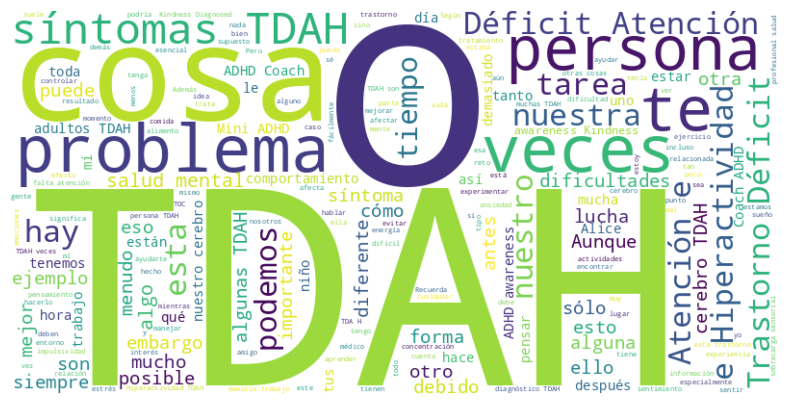

In [25]:
create_word_cloud(output_dir)

In [13]:
pip show wordcloud matplotlib


Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/python/3.10.13/lib/python3.10/site-packages
Requires: matplotlib, numpy, pillow
Required-by: 
---
Name: matplotlib
Version: 3.9.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby grants Licensee a nonexclusive, r

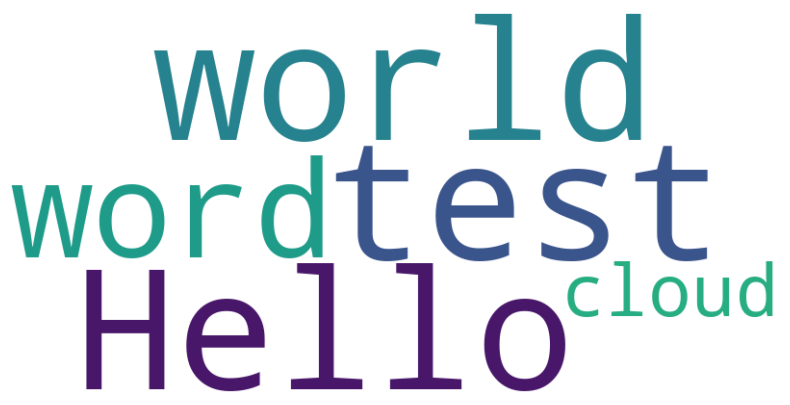

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Test text for the word cloud
text = "Hello world! This is a test word cloud."

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
